In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

C:\Users\mwamb\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [2]:
#df = pd.read_csv('C:/Users/jeanl/Desktop/trial.csv',index_col=False)
df = pd.read_pickle("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/HCR IOM/hcriomdata_clean")

In [3]:
df

,cluster,words,words_description,words_description_str,langs,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,HCR IOM,GLOBAL \nTRENDSFORCED DISPLACEMENT\n IN 20192019 IN REVIEW\nTrends at a Glance\nat the end of 20...,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e...",GLOBAL TRENDSFORCED DISPLACEMENT IN 20192019 IN REVIEW Trends at a Glance at the end of 2019 as ...,en,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e...","[global, trendsforced, displacement, in, 20192019, in, review, trends, at, a, glance, at, the, e...","[global, trendsforced, displacement, in, 20192019, in, review, trends, at, a, glance, at, the, e...","[global, trendsforced, displacement, 20192019, review, trends, glance, end, 2019, result, persec...","[(global, JJ), (trendsforced, VBD), (displacement, JJ), (20192019, CD), (review, NN), (trends, N...","[(global, a), (trendsforced, v), (displacement, a), (20192019, n), (review, n), (trends, n), (gl...","[global, trendsforced, displacement, 20192019, review, trend, glance, end, 2019, result, persecu..."


In [4]:
df = df[['cluster', 'lemmatized']]
df

,cluster,lemmatized
0,HCR IOM,"[global, trendsforced, displacement, 20192019, review, trend, glance, end, 2019, result, persecu..."


## Sentiment Analysis

In [5]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]
df

,cluster,lemmatized,lemma_str
0,HCR IOM,"[global, trendsforced, displacement, 20192019, review, trend, glance, end, 2019, result, persecu...",global trendsforced displacement 20192019 review trend glance end 2019 result persecution con˜ic...


In [6]:
df['sentiment'] = df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df

,cluster,lemmatized,lemma_str,sentiment
0,HCR IOM,"[global, trendsforced, displacement, 20192019, review, trend, glance, end, 2019, result, persecu...",global trendsforced displacement 20192019 review trend glance end 2019 result persecution con˜ic...,0.085858


## HCR IOM

### Data Exploration

https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

In [7]:
corpus= df['lemma_str']

In [8]:
corpus

0    global trendsforced displacement 20192019 review trend glance end 2019 result persecution con˜ic...
Name: lemma_str, dtype: object

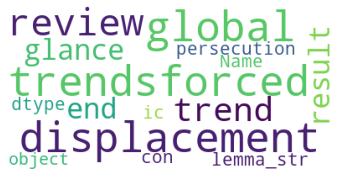

In [9]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                         
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

## Text preparation

Text in the corpus needs to be converted to a format that can be interpreted by the machine learning algorithms. 
There are 2 parts of this conversion

— Tokenisation and Vectorisation.
Tokenisation is the process of converting the continuous text into a list of words. 
The list of words is then converted to a matrix of integers by the process of vectorisation. Vectorisation is also called feature extraction.

For text preparation we use the bag of words model which ignores the sequence of the words and only considers word frequencies.

### Creating a vector of word counts
As the first step of conversion, we will use the CountVectoriser to tokenise the text and build a vocabulary of known words.
We first create a variable “cv” of the CountVectoriser class, and then evoke the fit_transform function to learn and build the vocabulary.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=1.0, min_df=1, max_features=None, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [11]:
list(cv.vocabulary_.keys())[:50]


['global',
 'trendsforced',
 'displacement',
 '20192019',
 'review',
 'trend',
 'glance',
 'end',
 '2019',
 'result',
 'persecution',
 'con',
 'ict',
 'violence',
 'human',
 'right',
 'violation',
 'event',
 'seriously',
 'disturb',
 'public',
 'order',
 '79',
 'million',
 'forcibly',
 'displace',
 'worldwide',
 '107',
 '800',
 'refugee',
 'resettle',
 'unhcr',
 'submit',
 '81',
 '600',
 'state',
 'resettlement',
 'accord',
 'government',
 'statistic',
 '26',
 'country',
 'admit',
 'year',
 'without',
 'assistance',
 '40',
 'child',
 'estimate',
 '30']

### Unigram Bigram and trigram 

https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

[Text(0, 0, 'migration'),
 Text(1, 0, 'migrant'),
 Text(2, 0, 'country'),
 Text(3, 0, 'refugee'),
 Text(4, 0, '2018'),
 Text(5, 0, 'international'),
 Text(6, 0, 'available'),
 Text(7, 0, 'global'),
 Text(8, 0, '2019'),
 Text(9, 0, 'policy'),
 Text(10, 0, 'health'),
 Text(11, 0, 'state'),
 Text(12, 0, 'population'),
 Text(13, 0, 'million'),
 Text(14, 0, 'child'),
 Text(15, 0, '2017'),
 Text(16, 0, 'number'),
 Text(17, 0, 'report'),
 Text(18, 0, 'united'),
 Text(19, 0, 'unhcr')]

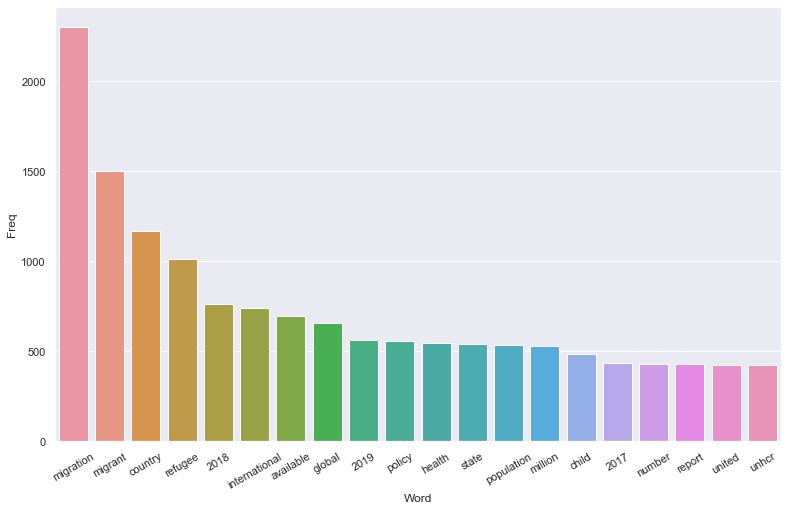

In [12]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                    Bi-gram  Freq
0             available www   330
1   international migration   232
2                  per cent   231
3             united nation   197
4            global compact   196
5              united state   169
6            available http   163
7                 signi can   161
8           available https   147
9            climate change   132
10    international migrant   120
11                  con ict   115
12         migration report   111
13           migrant worker   108
14              human right   106
15         migration health   104
16          world migration   103
17                 new york    97
18         geneva available    92
19                  iom int    90


[Text(0, 0, 'available www'),
 Text(1, 0, 'international migration'),
 Text(2, 0, 'per cent'),
 Text(3, 0, 'united nation'),
 Text(4, 0, 'global compact'),
 Text(5, 0, 'united state'),
 Text(6, 0, 'available http'),
 Text(7, 0, 'signi can'),
 Text(8, 0, 'available https'),
 Text(9, 0, 'climate change'),
 Text(10, 0, 'international migrant'),
 Text(11, 0, 'con ict'),
 Text(12, 0, 'migration report'),
 Text(13, 0, 'migrant worker'),
 Text(14, 0, 'human right'),
 Text(15, 0, 'migration health'),
 Text(16, 0, 'world migration'),
 Text(17, 0, 'new york'),
 Text(18, 0, 'geneva available'),
 Text(19, 0, 'iom int')]

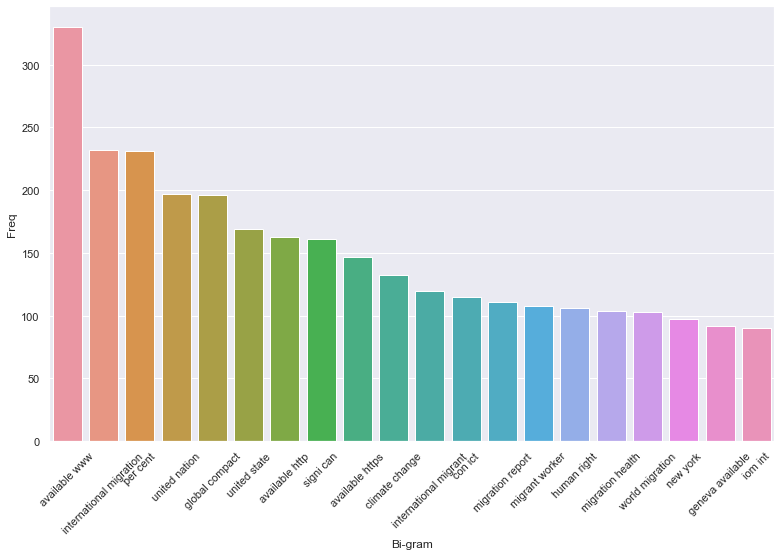

In [13]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                      Tri-gram  Freq
0       world migration report   103
1     global compact migration    75
2         iom geneva available    57
3         safe orderly regular    53
4    orderly regular migration    51
5                   doi org 10    51
6        migration report 2018    47
7     migration human security    46
8      journal migration human    45
9         publications iom int    43
10     latin america caribbean    42
11      global compact refugee    41
12        syrian arab republic    40
13        geneva available www    40
14         global compact safe    37
15        compact safe orderly    37
16  venezuelan displace abroad    35
17           sites default les    35
18          new york available    34
19       geneva available http    33


[Text(0, 0, 'world migration report'),
 Text(1, 0, 'global compact migration'),
 Text(2, 0, 'iom geneva available'),
 Text(3, 0, 'safe orderly regular'),
 Text(4, 0, 'orderly regular migration'),
 Text(5, 0, 'doi org 10'),
 Text(6, 0, 'migration report 2018'),
 Text(7, 0, 'migration human security'),
 Text(8, 0, 'journal migration human'),
 Text(9, 0, 'publications iom int'),
 Text(10, 0, 'latin america caribbean'),
 Text(11, 0, 'global compact refugee'),
 Text(12, 0, 'syrian arab republic'),
 Text(13, 0, 'geneva available www'),
 Text(14, 0, 'global compact safe'),
 Text(15, 0, 'compact safe orderly'),
 Text(16, 0, 'venezuelan displace abroad'),
 Text(17, 0, 'sites default les'),
 Text(18, 0, 'new york available'),
 Text(19, 0, 'geneva available http')]

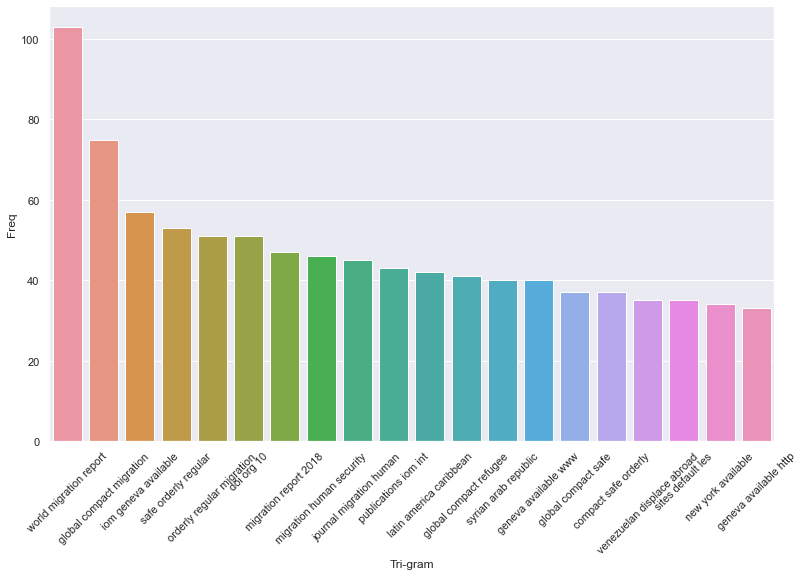

In [14]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

## Topic Modeling

https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d

In [15]:


tf_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=None)
tf = tf_vectorizer.fit_transform(df['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,00,000,0000000041,0000022124,0001,00010,000100,000116,0001441,00015,...,ﬁworking,ﬁworld,ﬁyemeni,ﬁyou,ﬁyouth,ﬁzero,ﬂan,ﬂcasablanca,ﬂenvironmental,ﬂpeople
0,3,279,1,1,5,1,4,1,1,1,...,1,2,1,1,2,2,1,1,1,1


### Latent Dirichlet Allocation (LDA) Topic Modeling

In [16]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=50, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
migration migrant country refugee 2018 million health report global available
Topic 1:
migration migrant country refugee global international 2018 2019 number state
Topic 2:
migration migrant country global refugee policy available million 2018 population
Topic 3:
migration country migrant international available refugee 2018 policy million health
Topic 4:
migration migrant refugee country 2018 international global child health million
Topic 5:
migration migrant country refugee 2018 international available global 2019 policy
Topic 6:
migration migrant country refugee 2018 international child 2019 health population
Topic 7:
migration migrant country refugee 2019 international state available 2018 health
Topic 8:
migration migrant refugee country global international 2018 state child population
Topic 9:
migration migrant country refugee international 2018 available 2019 population number


### pyLDAvis

In [17]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel


C:\Users\mwamb\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
5     -193.422440   62.581131       1        1  99.999227
9       -3.200575  248.889221       2        1   0.000086
7      233.079254 -106.619522       3        1   0.000086
3      213.397034  154.537781       4        1   0.000086
4        7.755979  -17.149942       5        1   0.000086
0     -225.629517  328.527985       6        1   0.000086
2     -399.101807 -109.368385       7        1   0.000086
1       39.805519 -283.310089       8        1   0.000086
6     -182.415619 -203.320938       9        1   0.000086
8     -418.865234  151.748871      10        1   0.000086, topic_info=      Category         Freq           Term        Total  loglift  logprob
9557   Default  2269.000000      migration  2269.000000  30.0000  30.0000
9539   Default  1484.000000        migrant  1484.000000  29.0000  29.0000
5620   Default  1152.000000        country  1152.000000  28.0000  28.0000
11362  Default   997.000000        refugee   997.000000  27.0000  27.0000
8384   Default   733.000000  international   733.000000  26.0000  26.0000
...        ...          ...            ...          ...      ...      ...
5040   Topic10     0.000008         change   378.095352  -3.6776  -9.4079
6024   Topic10     0.000008    development   312.942970  -3.4928  -9.4121
10582  Topic10     0.000008            per   250.775032  -3.2793  -9.4201
217    Topic10     0.000008             10   285.313148  -3.4081  -9.4199
9594   Topic10     0.000008        million   525.105600  -4.0061  -9.4078

[630 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
1          1  0.998335           000
35         1  0.914792        003new
38         1  0.916079           005
98         1  0.915601           031
110        1  0.914825     03_volume
...      ...       ...           ...
14241      1  0.915473      ﬁleaving
14244      1  0.915366      ﬁliberal
14247      1  0.915979       ﬁlogicﬂ
14312      1  0.915810  ﬁreconciling
14357      1  0.914618         ﬁtopﬂ

[335 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 10, 8, 4, 5, 1, 3, 2, 7, 9])